In [5]:
pip install mlforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [6]:
import mlforecast

In [7]:
import pandas as pd

In [8]:
import glob

In [9]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Import data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data_path = '/content/drive/MyDrive/dataset'

In [13]:
data_list = glob.glob(f'{data_path}/*.csv')

In [14]:
data_list

['/content/drive/MyDrive/dataset/FPT.csv',
 '/content/drive/MyDrive/dataset/MSN.csv',
 '/content/drive/MyDrive/dataset/VIC.csv',
 '/content/drive/MyDrive/dataset/PNJ.csv']

In [85]:
result = {}
for data, stock in zip(data_list, stock_list):
    result[stock] = pd.read_csv(data)

In [18]:
from datetime import datetime as dt
def format_dt(row):
    row = dt.strptime(row, '%m/%d/%Y %H:%M')
    return row

for df in result.values():
    df['datetime'] = df['Date/Time'].apply(lambda row: format_dt(row))
    df['date'] = df['datetime'].apply(lambda row: row.date())
    df['time'] = df['datetime'].apply(lambda row: row.time())
    df['date_fmt'] = df['date'].apply(lambda row: dt.strptime(str(row),'%Y-%m-%d'))

In [19]:
def generate_target(i):
    i['close_shift1'] = i['Close'].shift(-1)
    i['target'] = (i['close_shift1'] - i['Close'])/i['Close']
    return i

In [20]:
result_byDate = {}

In [21]:
for stock, df in result.items():
    df_byDate = df.groupby(['Ticker', 'date','date_fmt']).agg(
        {'Open':'first',
        'High':'max',
        'Low':'min',
        'Close':'last',
        'Volume':'sum'}
    )
    df_byDate.reset_index(inplace=True)
    df_byDate = generate_target(df_byDate)
    result_byDate[stock] = df_byDate

In [22]:
result_byDate['FPT']

,Ticker,date,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
0,FPT,2018-12-25,2018-12-25,30.89,30.89,30.59,30.66,84960,30.89,0.007502
1,FPT,2018-12-26,2018-12-26,31.04,31.22,30.89,30.89,333590,31.19,0.009712
2,FPT,2018-12-27,2018-12-27,31.41,31.52,31.19,31.19,454860,31.49,0.009618
3,FPT,2018-12-28,2018-12-28,31.34,31.49,31.19,31.49,387170,30.74,-0.023817
4,FPT,2019-01-02,2019-01-02,31.19,31.45,30.70,30.74,459120,30.44,-0.009759
...,...,...,...,...,...,...,...,...,...,...
494,FPT,2020-12-16,2020-12-16,57.20,57.50,57.00,57.10,1995530,56.50,-0.010508
495,FPT,2020-12-17,2020-12-17,56.90,57.00,56.00,56.50,3594500,56.90,0.007080
496,FPT,2020-12-18,2020-12-18,56.50,57.00,56.50,56.90,1532820,57.50,0.010545
497,FPT,2020-12-21,2020-12-21,57.30,57.80,57.10,57.50,2307390,58.10,0.010435


In [23]:
lookup = dt.strptime('2018-10-17','%Y-%m-%d').date()

## EDA

In [24]:
print('Training data dựa trên 4 mã cổ phiếu {}'.format(list(result_byDate.keys())))

Training data dựa trên 4 mã cổ phiếu ['FPT', 'MSN', 'VIC', 'PNJ']


In [25]:
for stock, df_stock in result_byDate.items():
    print(stock)
    print('Bắt đầu: ',df_stock.date.min(), 'Kết thúc: ', df_stock.date.max())

FPT
Bắt đầu:  2018-12-25 Kết thúc:  2020-12-22
MSN
Bắt đầu:  2017-12-25 Kết thúc:  2020-12-22
VIC
Bắt đầu:  2018-10-17 Kết thúc:  2020-12-22
PNJ
Bắt đầu:  2018-02-28 Kết thúc:  2020-12-22


In [26]:
for stock, df_stock in result_byDate.items():
    print(stock)
    display(df_stock.describe().style.format('{:,.2f}'))

FPT


,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
count,499.00,499.00,499.00,499.00,499.00,499.00,498.00,498.00
mean,",.2f",44.30,44.76,43.91,44.33,"1,570,241.84",44.36,0.00
min,",.2f",30.29,30.89,30.22,30.44,"84,960.00",30.44,-0.07
25%,",.2f",38.26,38.59,37.90,38.09,"920,685.00",38.13,-0.01
50%,",.2f",46.50,47.00,46.09,46.52,"1,339,560.00",46.53,0.00
75%,",.2f",49.00,49.50,48.57,49.08,"2,004,005.00",49.08,0.01
max,",.2f",57.50,58.50,57.20,58.10,"6,853,810.00",58.10,0.07
std,nan,6.77,6.82,6.69,6.76,"953,078.07",6.74,0.02


MSN


,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
count,748.00,748.00,748.00,748.00,748.00,748.00,747.00,747.00
mean,",.2f",76.18,77.31,75.14,76.28,"1,028,469.22",76.28,0.00
min,",.2f",46.50,49.00,46.40,49.00,"57,480.00",49.00,-0.07
25%,",.2f",61.50,62.75,60.50,61.98,"442,827.50",61.95,-0.01
50%,",.2f",80.00,81.20,79.00,80.12,"744,850.00",80.14,0.00
75%,",.2f",86.50,87.90,85.60,86.86,"1,218,397.50",86.86,0.01
max,",.2f",115.00,118.00,113.00,114.60,"6,707,870.00",114.60,0.07
std,nan,14.88,15.07,14.59,14.82,"971,589.24",14.83,0.02


VIC


,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
count,548.00,548.00,548.00,548.00,548.00,548.00,547.00,547.00
mean,",.2f",105.95,106.93,104.86,106.06,"588,126.24",106.08,0.00
min,",.2f",71.50,75.00,68.00,71.50,"90,450.00",71.50,-0.07
25%,",.2f",96.00,96.78,94.90,96.00,"306,160.00",96.00,-0.01
50%,",.2f",105.80,106.90,104.60,105.80,"485,805.00",105.80,0.00
75%,",.2f",116.00,116.60,115.10,115.93,"763,432.50",115.95,0.00
max,",.2f",126.10,126.50,124.60,126.10,"2,855,700.00",126.10,0.07
std,nan,11.51,11.28,11.64,11.39,"390,843.58",11.40,0.02


PNJ


,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
count,709.00,709.00,709.00,709.00,709.00,709.00,708.00,708.00
mean,",.2f",72.39,74.06,71.33,72.41,"535,847.17",72.40,0.00
min,",.2f",45.10,48.74,44.04,45.90,"8,158.00",45.90,-0.08
25%,",.2f",66.12,67.93,65.25,66.10,"277,900.00",66.07,-0.01
50%,",.2f",72.72,74.45,71.86,72.72,"443,090.00",72.69,0.00
75%,",.2f",80.25,82.00,79.18,80.40,"709,350.00",80.40,0.01
max,",.2f",98.50,100.16,95.37,98.90,"2,362,950.00",98.90,0.07
std,nan,9.68,10.06,9.51,9.64,"383,870.24",9.64,0.02


In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
def quick_eda(stock):
    df_plot = result_byDate[stock]
    plt.figure(figsize=(13, 15))
    plt.subplot(4, 1, 1)
    sns.lineplot(data=df_plot, x=df_plot.date, y="Close", label="Close")
    plt.title("Close Prices {}".format(stock))
    plt.xlabel("Date/Time")
    plt.ylabel("Price ($)")
    plt.xticks(rotation=45)

    plt.subplot(4, 1, 2)
    sns.lineplot(data=df_plot, x=df_plot.date, y="target", label="Target")
    plt.title("Price chanage {}".format(stock))
    plt.xlabel("Date/Time")
    plt.ylabel("%change")
    plt.xticks(rotation=45)

    plt.subplot(4, 1, 3)
    sns.histplot(data=df_plot.target, bins=50)
    plt.title("Return distribution {}".format(stock))
    plt.xlabel("return")
    plt.xticks(rotation=45)

    plt.subplot(4, 1, 4)
    sns.lineplot(data=df_plot, x=df_plot.date, y="Volume", label="Volume")
    plt.title("Volume {}".format(stock))
    plt.xlabel("Date/Time")
    plt.ylabel("Volume")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [29]:
result_byDate.keys()

dict_keys(['FPT', 'MSN', 'VIC', 'PNJ'])

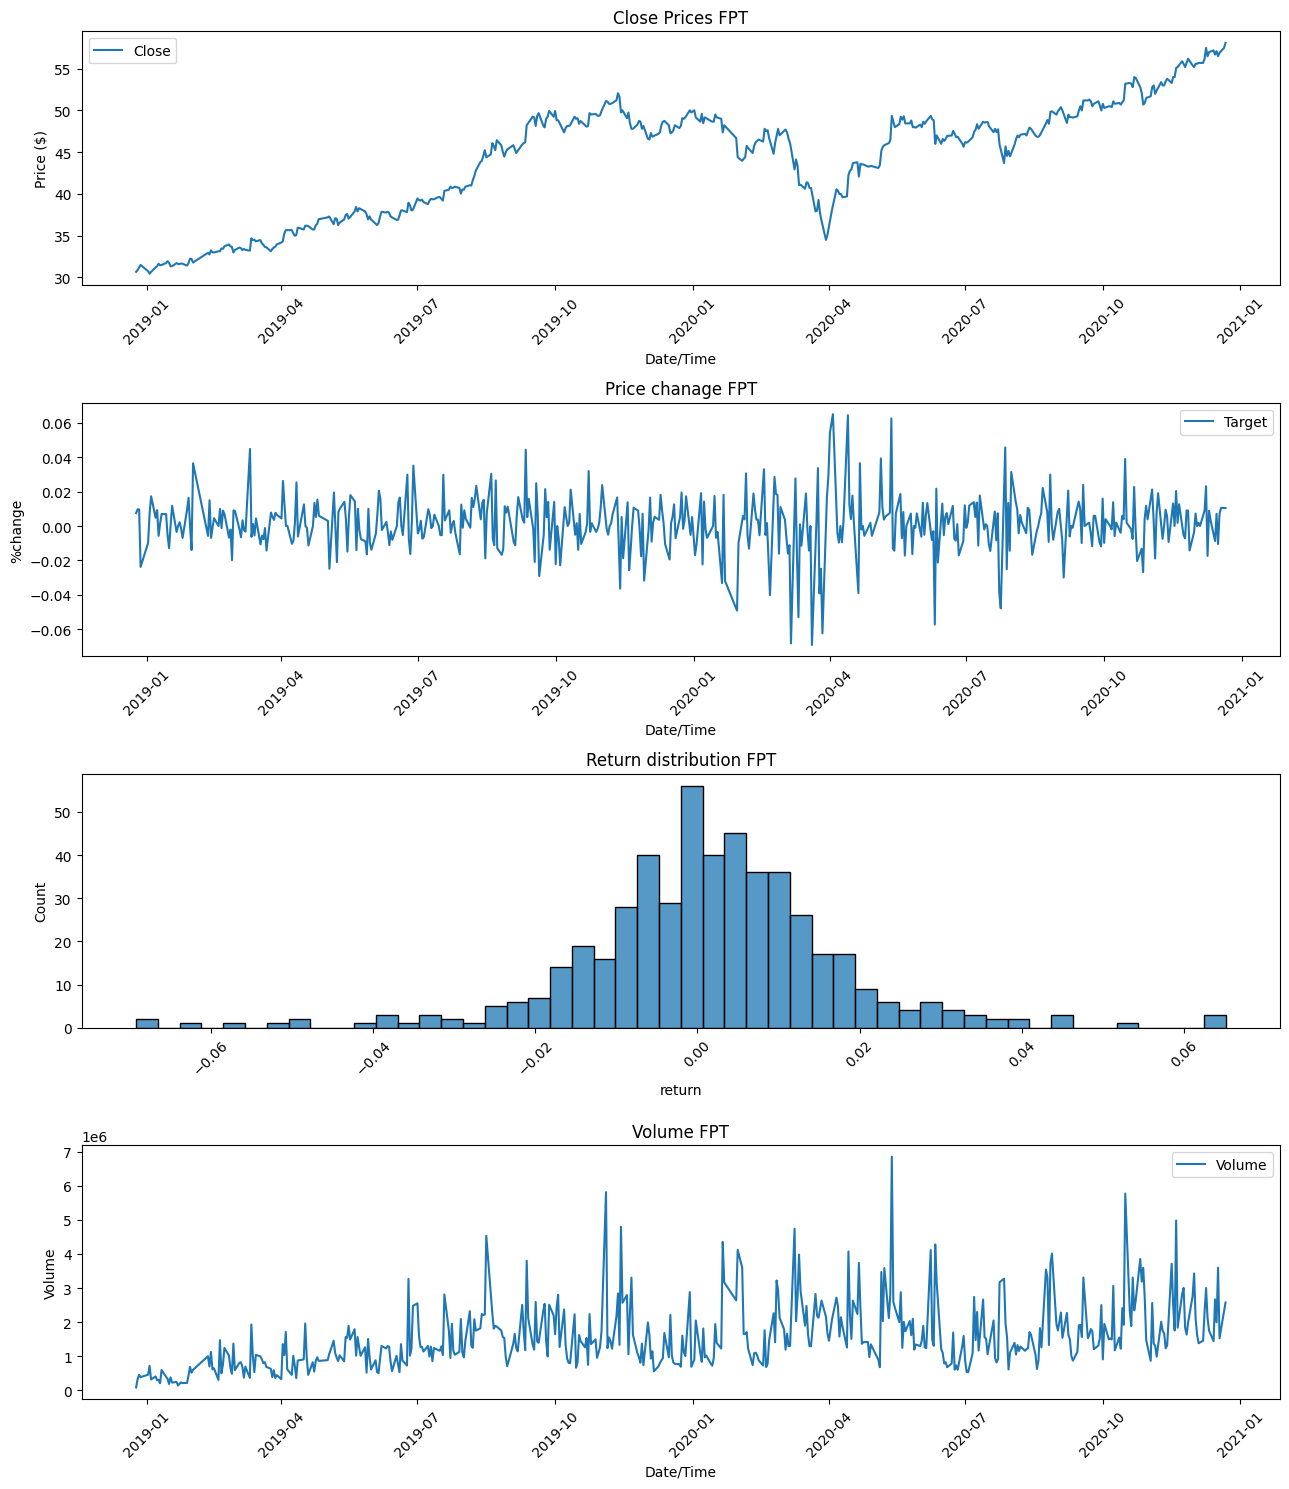

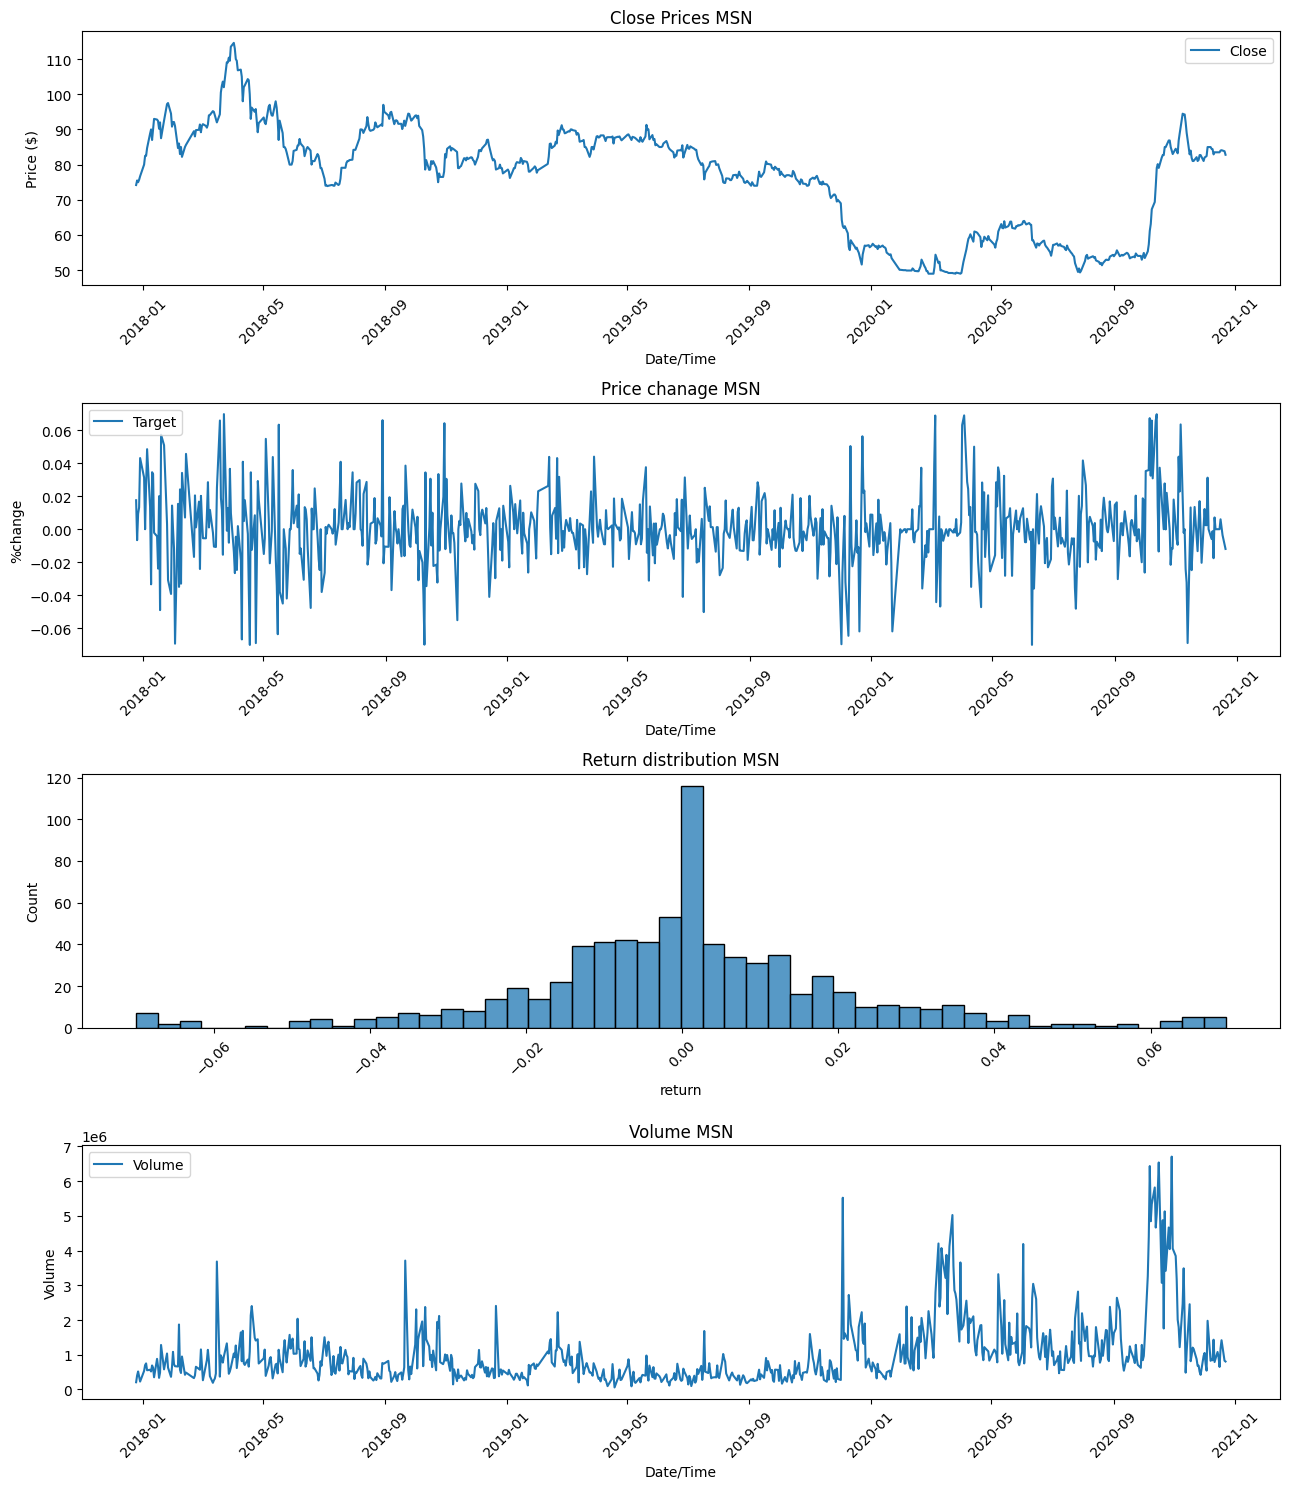

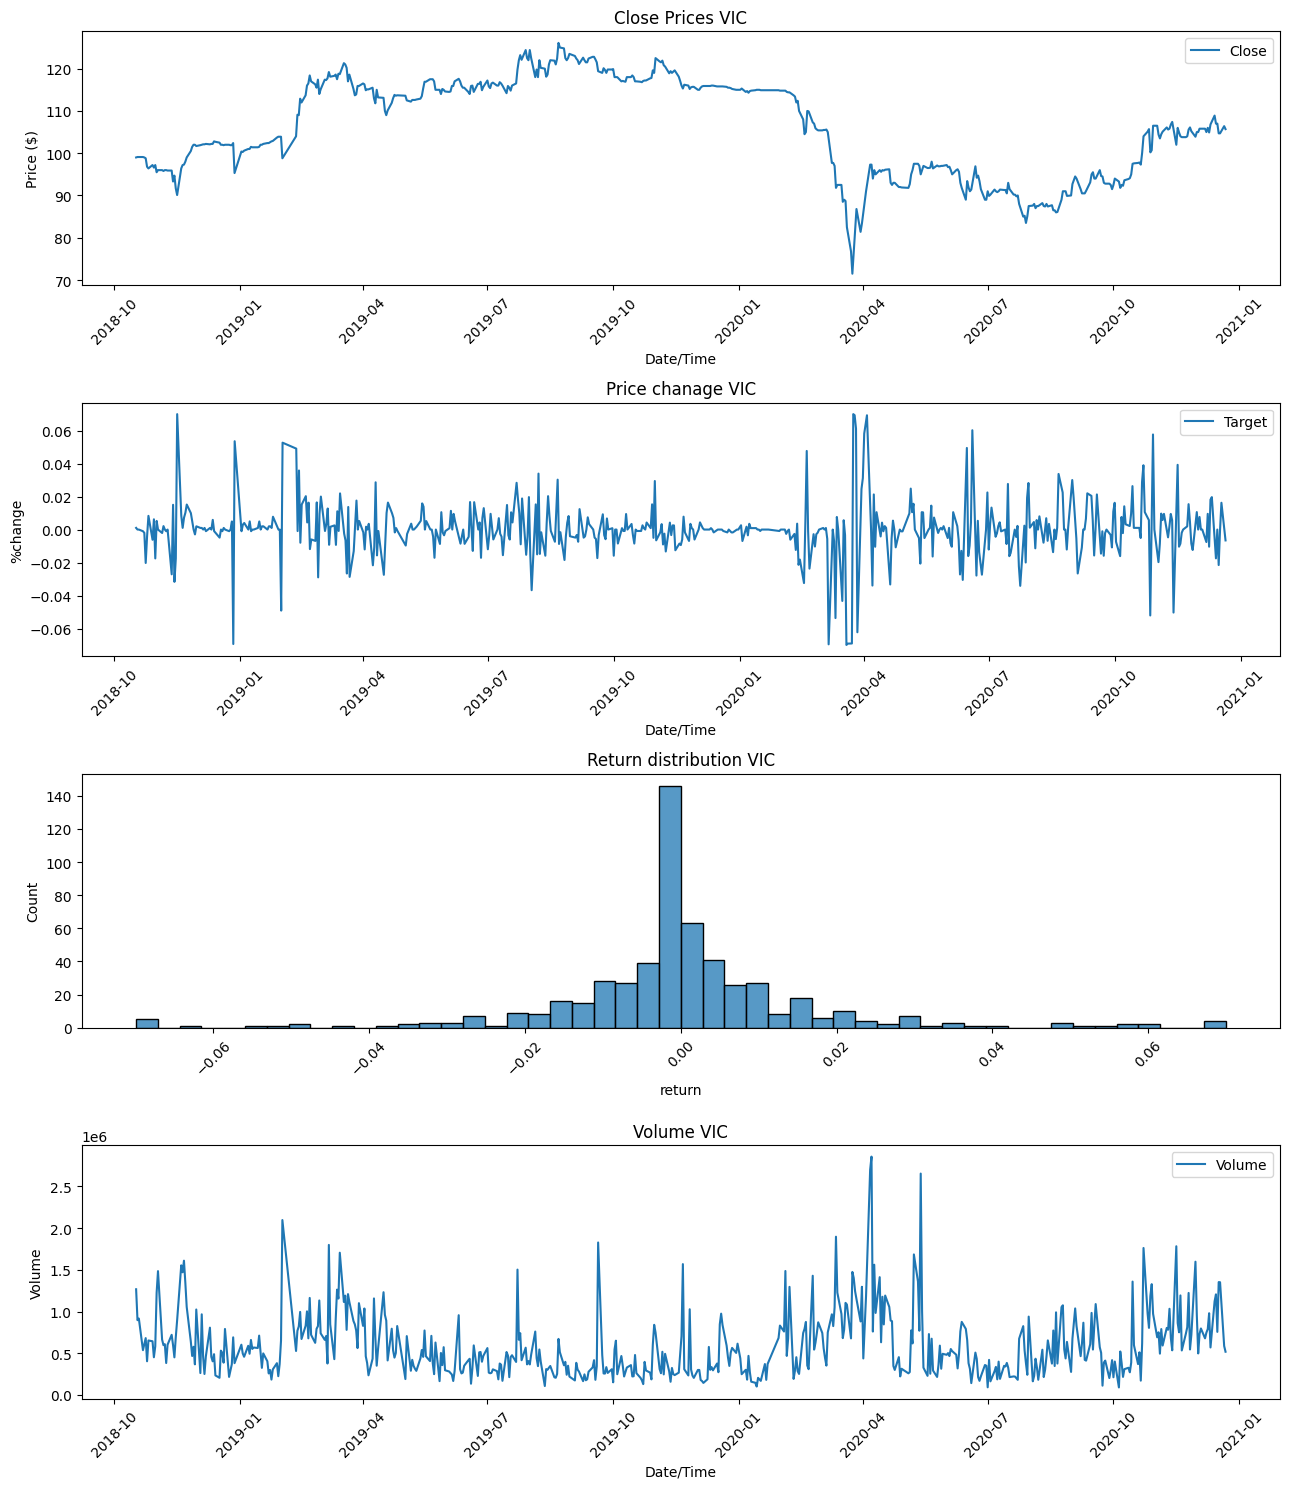

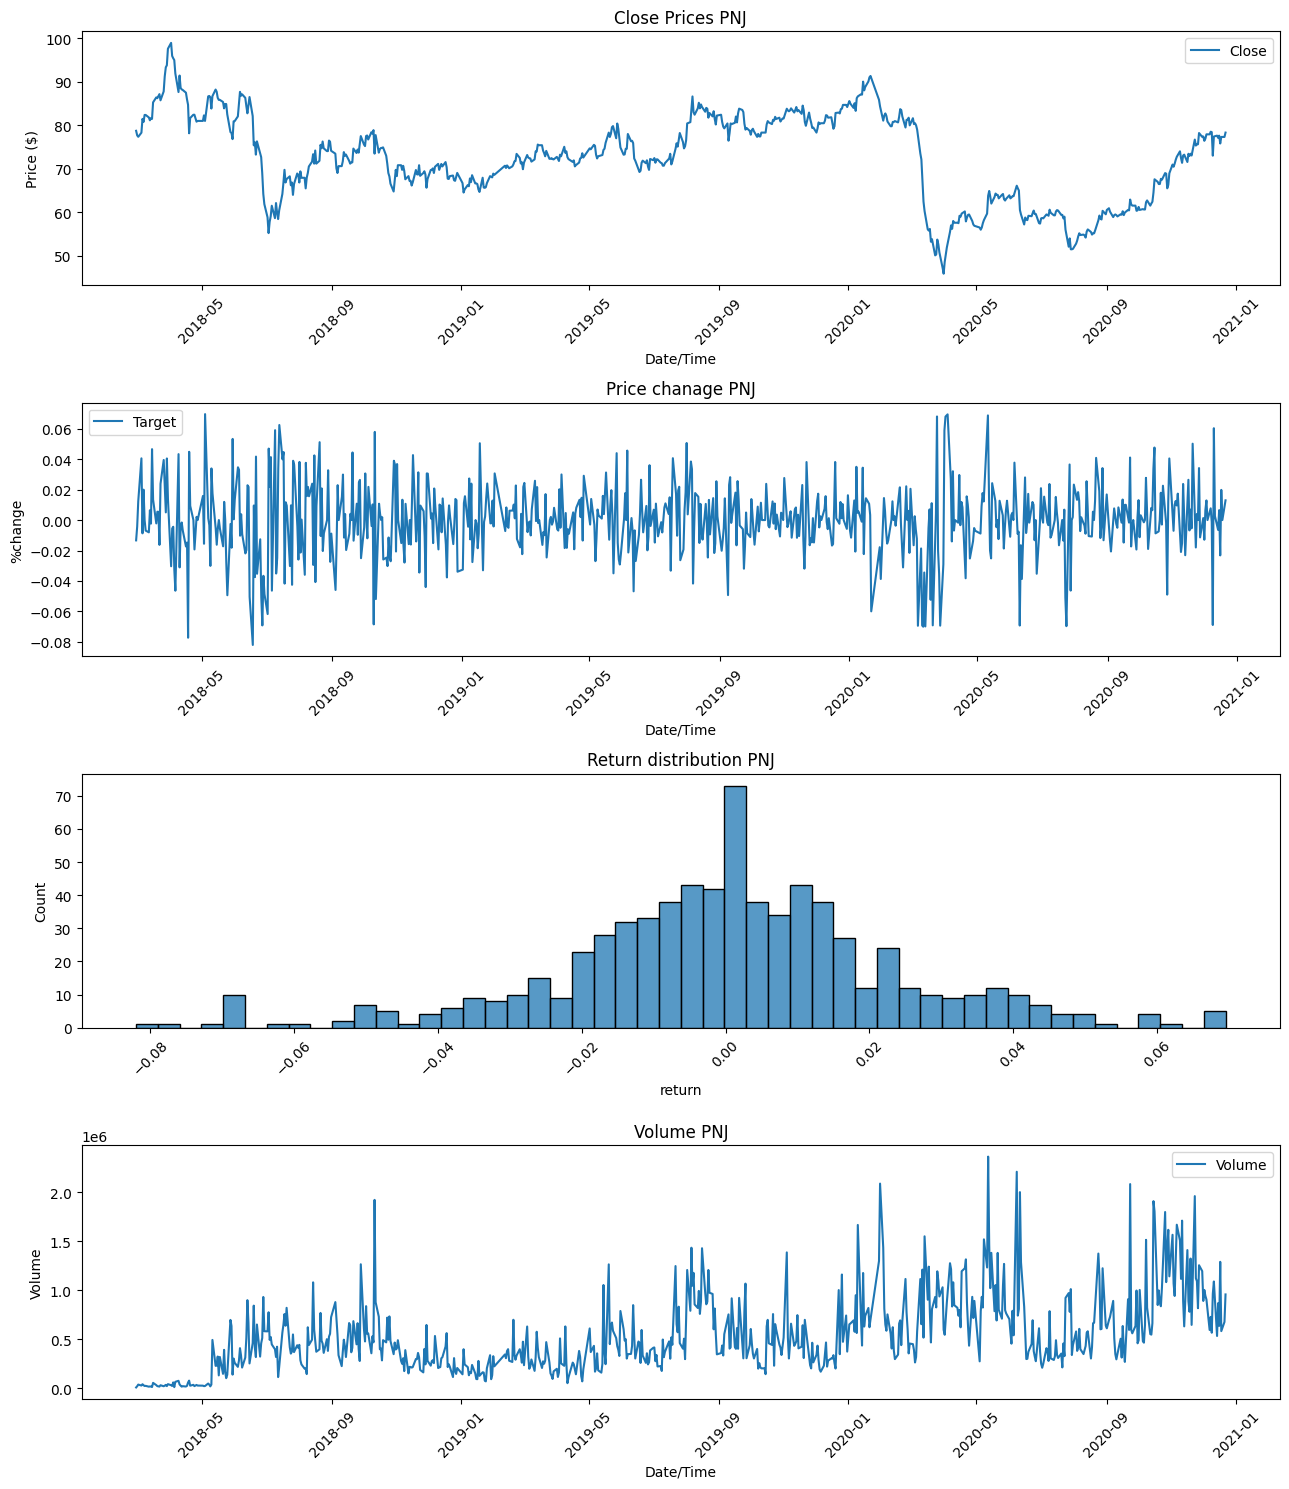

In [30]:
for i in result_byDate.keys():
    quick_eda(i)

## Stationary test

In [31]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# import matplotlib as mpl
import seaborn as sns

In [32]:
result_byDate.keys()

dict_keys(['FPT', 'MSN', 'VIC', 'PNJ'])

FPT


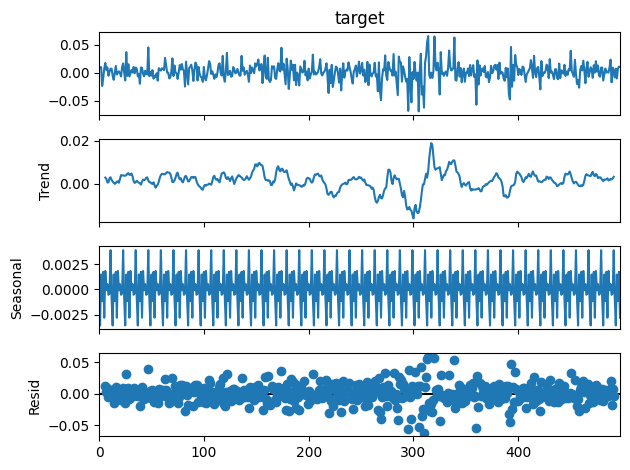

MSN


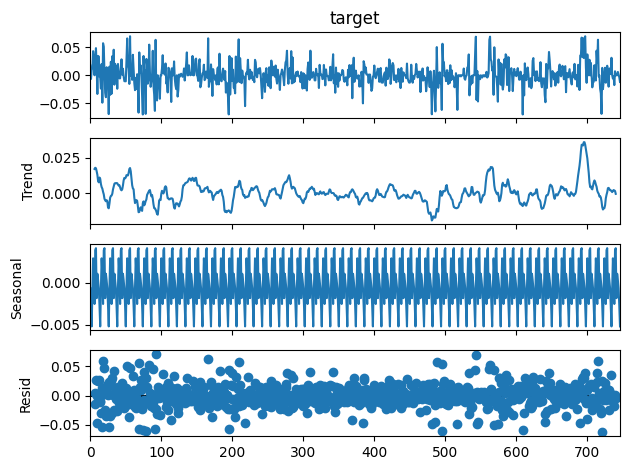

VIC


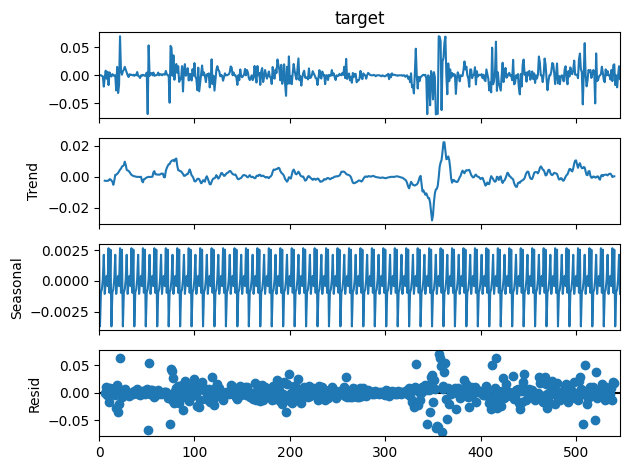

PNJ


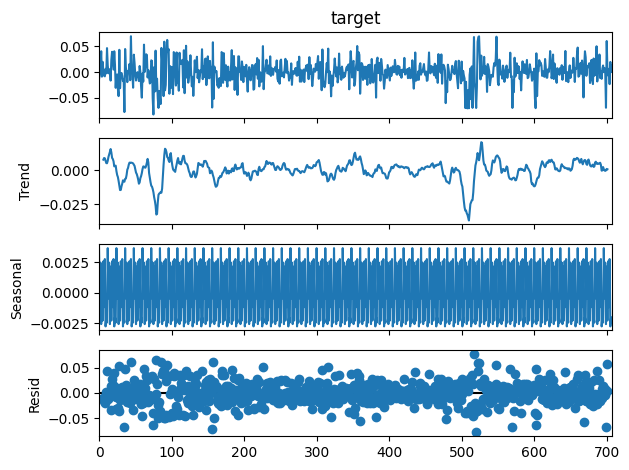

In [33]:
for i in result_byDate.keys():
    print(i)
    df_plot = result_byDate[i].copy()
    df_plot = df_plot[~df_plot["target"].isna()]
    decomposition = sm.tsa.seasonal_decompose(df_plot["target"],period =12)
    figure = decomposition.plot()

    plt.show()

In [34]:
result = adfuller(df_plot['target'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -26.290397
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [35]:
result = adfuller(df_plot['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.304179
p-value: 0.170624
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [36]:
decomposition = seasonal_decompose(df_plot['target'], model='additive', period =12)

In [37]:
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.604295
p-value: 0.000127


In [38]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -23044517933390.355469
p-value: 0.000000


In [39]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.416470
p-value: 0.000000


## Feature engineer

In [40]:
import lightgbm as lgb
from utilsforecast.plotting import plot_series
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
import mlforecast
import numpy as np
import pandas as pd
from mlforecast import MLForecast
from mlforecast.core import TimeSeries
from mlforecast.lag_transforms import ExpandingMean, RollingMean, SeasonalRollingMean

In [42]:
fcst = MLForecast(
    models=[],
    freq='1d',
    lags=[7 * (i+1) for i in range(8)],
    lag_transforms = {
        1:  [ExpandingMean()],
        1:  [RollingMean(7), RollingMean(14), RollingMean(28), SeasonalRollingMean(7, 4)],
        7:  [RollingMean(7), RollingMean(14), RollingMean(28), SeasonalRollingMean(7, 4)], # 7-day moving average for 7-day lags
        14: [RollingMean(7), RollingMean(14), RollingMean(28), SeasonalRollingMean(7, 4)],
        28: [RollingMean(7), RollingMean(14), RollingMean(28), SeasonalRollingMean(7, 4)],
    },
    date_features=['year', 'month', 'day', 'dayofweek', 'quarter', 'week'],
    num_threads=4
)

In [43]:
result_byDate_feat = {}
for stock, df_input in result_byDate.items():
    df_input = result_byDate[stock]
    df_input = df_input[~df_input['target'].isna()]
    df_input.rename(columns={'Ticker':'unique_id','date_fmt':'ds','target':'y'}, inplace=True)
    id_col_lst = ['unique_id','ds','y']
    df_process = fcst.preprocess(df_input, static_features=[])
    result_byDate_feat[stock] = df_process

feat_list = list(set(df_process.columns) - set(id_col_lst))

In [44]:
result_byDate['FPT'].head(2)

,Ticker,date,date_fmt,Open,High,Low,Close,Volume,close_shift1,target
0,FPT,2018-12-25,2018-12-25,30.89,30.89,30.59,30.66,84960,30.89,0.007502
1,FPT,2018-12-26,2018-12-26,31.04,31.22,30.89,30.89,333590,31.19,0.009712


In [47]:
df_feature = result_byDate_feat['FPT']

In [53]:
df_feature.head(5)

,unique_id,date,ds,Open,High,Low,Close,Volume,close_shift1,y,lag7,lag14,lag21,lag28,lag35,lag42,lag49,lag56,rolling_mean_lag1_window_size7,rolling_mean_lag1_window_size14,rolling_mean_lag1_window_size28,seasonal_rolling_mean_lag1_season_length7_window_size4,rolling_mean_lag7_window_size7,rolling_mean_lag7_window_size14,rolling_mean_lag7_window_size28,seasonal_rolling_mean_lag7_season_length7_window_size4,rolling_mean_lag14_window_size7,rolling_mean_lag14_window_size14,rolling_mean_lag14_window_size28,seasonal_rolling_mean_lag14_season_length7_window_size4,rolling_mean_lag28_window_size7,rolling_mean_lag28_window_size14,rolling_mean_lag28_window_size28,seasonal_rolling_mean_lag28_season_length7_window_size4,year,month,day,dayofweek,quarter,week
56,FPT,2019-03-22,2019-03-22,33.65,33.87,33.61,33.61,687690,33.13,-0.014281,0.001160,-0.002085,0.008977,0.014962,-0.006955,-0.012913,0.004809,0.007502,-0.003591,0.000168,0.000987,-0.000003,0.004391,0.001752,0.003452,0.005753,-0.000888,0.000589,0.002438,0.003724,0.008240,0.004287,0.002689,-0.000024,2019,3,22,4,1,12
57,FPT,2019-03-25,2019-03-25,32.98,33.57,32.98,33.13,633520,33.39,0.007848,-0.005506,-0.006567,0.006821,-0.006919,0.009551,0.000000,0.009253,0.009712,-0.005797,-0.000703,-0.000057,-0.001557,0.004543,0.000871,0.002915,-0.003043,-0.002800,0.000614,0.002203,0.000721,0.005887,0.003793,0.002095,0.002971,2019,3,25,0,1,13
58,FPT,2019-03-26,2019-03-26,33.57,33.57,33.20,33.39,386120,33.57,0.005391,0.004371,0.003305,-0.006775,-0.000909,0.016399,0.011806,-0.005691,0.009618,-0.003889,0.000327,0.000470,0.000649,0.004695,0.001667,0.002485,-0.000002,-0.001360,0.000915,0.001900,0.003005,0.003415,0.002884,0.001719,0.005401,2019,3,26,1,1,13
59,FPT,2019-03-27,2019-03-27,33.42,33.65,33.42,33.57,589040,33.69,0.003575,-0.010734,-0.002396,-0.002076,0.004548,0.000000,-0.003469,0.001272,-0.023817,-0.003744,0.000476,0.000695,0.001573,0.003504,0.001049,0.002102,-0.002664,-0.001406,0.000419,0.001938,0.000019,0.004065,0.003457,0.002732,0.000588,2019,3,27,2,1,13
60,FPT,2019-03-28,2019-03-28,33.39,33.84,33.39,33.69,362360,33.95,0.007717,-0.005572,-0.003302,-0.019911,0.000000,-0.013962,0.000000,0.006986,-0.009759,-0.001699,0.000902,0.000661,-0.002908,0.003180,0.002073,0.002401,-0.007196,0.000966,0.000183,0.001820,-0.009294,0.006059,0.003457,0.003081,-0.001744,2019,3,28,3,1,13


## Training and evaluation

In [55]:
df_feature.drop(['ds','year','month','day','dayofweek','quarter','week'], axis=1)

,unique_id,date,Open,High,Low,Close,Volume,close_shift1,y,lag7,lag14,lag21,lag28,lag35,lag42,lag49,lag56,rolling_mean_lag1_window_size7,rolling_mean_lag1_window_size14,rolling_mean_lag1_window_size28,seasonal_rolling_mean_lag1_season_length7_window_size4,rolling_mean_lag7_window_size7,rolling_mean_lag7_window_size14,rolling_mean_lag7_window_size28,seasonal_rolling_mean_lag7_season_length7_window_size4,rolling_mean_lag14_window_size7,rolling_mean_lag14_window_size14,rolling_mean_lag14_window_size28,seasonal_rolling_mean_lag14_season_length7_window_size4,rolling_mean_lag28_window_size7,rolling_mean_lag28_window_size14,rolling_mean_lag28_window_size28,seasonal_rolling_mean_lag28_season_length7_window_size4
56,FPT,2019-03-22,33.65,33.87,33.61,33.61,687690,33.13,-0.014281,0.001160,-0.002085,0.008977,0.014962,-0.006955,-0.012913,0.004809,0.007502,-0.003591,0.000168,0.000987,-0.000003,0.004391,0.001752,0.003452,0.005753,-0.000888,0.000589,0.002438,0.003724,0.008240,0.004287,0.002689,-0.000024
57,FPT,2019-03-25,32.98,33.57,32.98,33.13,633520,33.39,0.007848,-0.005506,-0.006567,0.006821,-0.006919,0.009551,0.000000,0.009253,0.009712,-0.005797,-0.000703,-0.000057,-0.001557,0.004543,0.000871,0.002915,-0.003043,-0.002800,0.000614,0.002203,0.000721,0.005887,0.003793,0.002095,0.002971
58,FPT,2019-03-26,33.57,33.57,33.20,33.39,386120,33.57,0.005391,0.004371,0.003305,-0.006775,-0.000909,0.016399,0.011806,-0.005691,0.009618,-0.003889,0.000327,0.000470,0.000649,0.004695,0.001667,0.002485,-0.000002,-0.001360,0.000915,0.001900,0.003005,0.003415,0.002884,0.001719,0.005401
59,FPT,2019-03-27,33.42,33.65,33.42,33.57,589040,33.69,0.003575,-0.010734,-0.002396,-0.002076,0.004548,0.000000,-0.003469,0.001272,-0.023817,-0.003744,0.000476,0.000695,0.001573,0.003504,0.001049,0.002102,-0.002664,-0.001406,0.000419,0.001938,0.000019,0.004065,0.003457,0.002732,0.000588
60,FPT,2019-03-28,33.39,33.84,33.39,33.69,362360,33.95,0.007717,-0.005572,-0.003302,-0.019911,0.000000,-0.013962,0.000000,0.006986,-0.009759,-0.001699,0.000902,0.000661,-0.002908,0.003180,0.002073,0.002401,-0.007196,0.000966,0.000183,0.001820,-0.009294,0.006059,0.003457,0.003081,-0.001744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,FPT,2020-12-15,57.50,57.50,56.60,56.70,2666900,57.10,0.007055,0.000000,0.009058,0.013133,0.007692,-0.026871,0.001880,0.013889,-0.009785,0.002619,0.001969,0.003144,-0.005858,0.000025,0.002253,0.003411,0.007471,0.004480,0.004417,0.001653,0.000753,0.004786,-0.001111,0.001342,-0.000853
494,FPT,2020-12-16,57.20,57.50,57.00,57.10,1995530,56.50,-0.010508,0.008977,0.008977,0.000000,0.019084,0.003945,-0.001876,-0.005871,-0.011858,0.003627,0.001826,0.003122,0.007311,0.000025,0.002894,0.003591,0.009259,0.005763,0.003695,0.002041,0.008001,0.006949,0.000386,0.002447,0.003820
495,FPT,2020-12-17,56.90,57.00,56.00,56.50,3594500,56.90,0.007080,0.023132,-0.014235,0.020370,-0.007491,0.011788,-0.007519,0.001969,0.016000,0.000843,0.000434,0.002065,0.001861,0.005363,0.003091,0.003996,0.005444,0.000819,0.003213,0.001801,0.002608,0.004195,0.000388,0.001608,-0.000313
496,FPT,2020-12-18,56.50,57.00,56.50,56.90,1532820,57.50,0.010545,-0.017391,-0.003610,0.001815,0.000000,0.003883,0.022727,-0.003929,-0.009843,-0.001450,0.001957,0.002585,0.009087,0.003395,0.001719,0.003236,-0.004797,0.000044,0.002955,0.000860,0.000522,0.003640,-0.001235,0.001960,0.005670


In [83]:
df_feature.describe()

,ds,Open,High,Low,Close,Volume,close_shift1,y,lag7,lag14,lag21,lag28,lag35,lag42,lag49,lag56,rolling_mean_lag1_window_size7,rolling_mean_lag1_window_size14,rolling_mean_lag1_window_size28,seasonal_rolling_mean_lag1_season_length7_window_size4,rolling_mean_lag7_window_size7,rolling_mean_lag7_window_size14,rolling_mean_lag7_window_size28,seasonal_rolling_mean_lag7_season_length7_window_size4,rolling_mean_lag14_window_size7,rolling_mean_lag14_window_size14,rolling_mean_lag14_window_size28,seasonal_rolling_mean_lag14_season_length7_window_size4,rolling_mean_lag28_window_size7,rolling_mean_lag28_window_size14,rolling_mean_lag28_window_size28,seasonal_rolling_mean_lag28_season_length7_window_size4,year,month,day,dayofweek,quarter,week
count,442,442.000000,442.000000,442.000000,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,2020-02-07 03:05:42.081447936,45.756923,46.239842,45.343235,45.794344,1.690253e+06,45.849751,0.001377,0.001276,0.001281,0.001303,0.001249,0.001299,0.001336,0.001249,0.001266,0.001293,0.001298,0.001283,0.001287,0.001301,0.001291,0.001277,0.001277,0.001280,0.001270,0.001267,0.001283,0.001267,0.001263,0.001273,0.001283,2019.552036,7.126697,15.692308,2.006787,2.708145,29.361991
min,2019-03-22 00:00:00,32.980000,33.570000,32.980000,33.130000,3.275000e+05,33.130000,-0.069253,-0.069253,-0.069253,-0.069253,-0.069253,-0.069253,-0.069253,-0.069253,-0.069253,-0.022833,-0.017021,-0.010997,-0.034614,-0.022833,-0.017021,-0.010997,-0.034614,-0.022833,-0.017021,-0.010997,-0.034614,-0.022833,-0.017021,-0.010997,-0.034614,2019.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2019-08-29 06:00:00,40.880000,41.467500,40.512500,41.010000,1.031452e+06,41.045000,-0.007188,-0.007188,-0.007152,-0.007092,-0.007019,-0.006948,-0.006906,-0.006844,-0.006925,-0.001659,-0.000522,-0.000155,-0.003186,-0.001690,-0.000522,-0.000155,-0.003186,-0.001699,-0.000522,-0.000155,-0.003142,-0.001699,-0.000522,-0.000155,-0.003142,2019.000000,5.000000,8.000000,1.000000,2.000000,19.000000
50%,2020-02-10 12:00:00,47.200000,47.735000,46.780000,47.200000,1.455160e+06,47.245000,0.001687,0.001627,0.001595,0.001619,0.001368,0.001114,0.001047,0.001067,0.001216,0.001646,0.001949,0.001515,0.001252,0.001672,0.001836,0.001509,0.001214,0.001646,0.001786,0.001509,0.001133,0.001672,0.001807,0.001522,0.001067,2020.000000,7.000000,16.000000,2.000000,3.000000,30.000000
75%,2020-07-16 18:00:00,49.250000,49.600000,48.830000,49.250000,2.117695e+06,49.250000,0.010012,0.009766,0.009766,0.009766,0.009619,0.009766,0.009638,0.009455,0.009602,0.004894,0.003370,0.002866,0.005887,0.004894,0.003370,0.002856,0.005818,0.004894,0.003370,0.002848,0.005730,0.004822,0.003366,0.002835,0.005689,2020.000000,10.000000,23.000000,3.000000,4.000000,41.000000
max,2020-12-21 00:00:00,57.500000,57.900000,57.100000,57.500000,6.853810e+06,58.100000,0.065143,0.065143,0.065143,0.065143,0.065143,0.065143,0.065143,0.065143,0.065143,0.021720,0.017507,0.012564,0.039018,0.021720,0.017507,0.012564,0.039018,0.021720,0.017507,0.012564,0.039018,0.021720,0.017507,0.012564,0.039018,2020.000000,12.000000,31.000000,4.000000,4.000000,52.000000
std,NaN,5.613695,5.623406,5.558013,5.583103,9.346736e+05,5.583431,0.016582,0.016573,0.016649,0.016663,0.016634,0.016701,0.016588,0.016468,0.016533,0.006030,0.004179,0.002830,0.008071,0.006039,0.004178,0.002829,0.008089,0.006045,0.004177,0.002823,0.008142,0.006042,0.004174,0.002824,0.008135,0.497848,3.130895,8.671134,1.419798,1.031643,13.681349
